In [2]:
from astropy import stats
import scipy.ndimage
import numpy as np
%matplotlib inline
import pylab as plt
plt.rcParams['image.origin'] = 'lower'
import glob
from astropy.io import fits
from astropy import visualization
from astropy import coordinates, units as u
from astropy.table import Table, Column
from astropy import table
from astropy import wcs
from astroquery.vizier import Vizier
from astroplan import FixedTarget
from astroplan.plots import plot_finder_image
from astroquery.simbad import Simbad
Simbad.reset_votable_fields()
Simbad.add_votable_fields('flux(V)', 'flux(B)', 'flux(I)', 'otype')


>>> from astroplan import download_IERS_A
>>> download_IERS_A()
 [astroplan.utils]


In [7]:
name1 = glob.glob('gc_*.fits')
name2 = [fits.getdata(x) for x in name1]

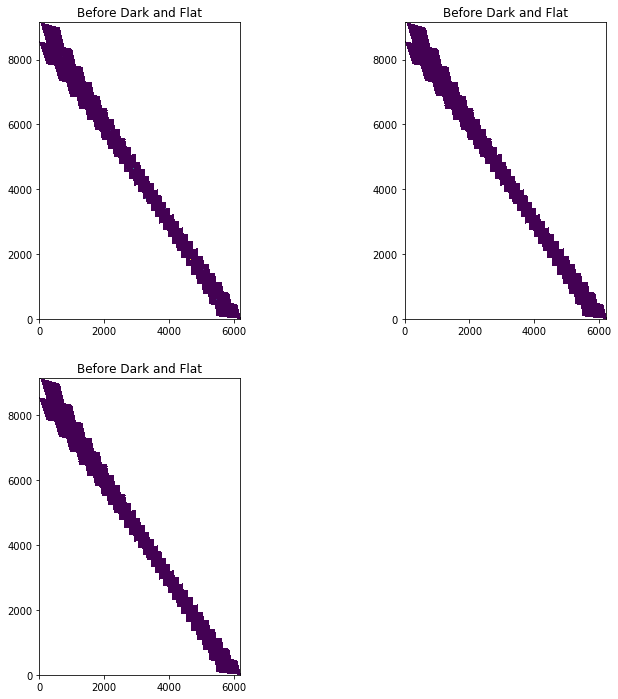

In [10]:
plt.figure(figsize=(12,12))

for ii in range(3):
    ax = plt.subplot(2,2,ii+1)
    ax.imshow(name2[ii], origin='lower', vmax=2500, vmin=500)
    ax.set_title("Before Dark and Flat")

In [16]:
header1 = fits.getheader(name1[0])
header2 = fits.getheader(name1[1])
header3 = fits.getheader(name1[2])
ww = wcs.WCS(header1)

In [18]:
tlx, tly = ww.wcs_pix2world(2.5, 2.5, 0)
brx, bry = ww.wcs_pix2world(3.5, 1.5, 0)

In [19]:
ra1, dec1 = ww.wcs_pix2world(137,81,0)
center1 = coordinates.SkyCoord(ra1, dec1, frame='fk5', unit=(u.deg, u.deg))
calstar = Simbad.query_region(center1, radius=5*u.arcsec)
calstar

C:\Users\mjfer\Anaconda3\lib\site-packages\astroquery\simbad\core.py:138: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '22:04:03.5796 -52:45:29.8092': No astronomical object found :
  (error.line, error.msg))


In [20]:
np.shape(name2[1])

(9142, 6202)

In [96]:
np.isnan(name2[0][4571][3101])

False

In [25]:
name2[1]

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [30]:
arr = np.array((9142, 6202), int)
print(arr)

[9142 6202]


In [32]:
range(9142)

range(0, 9142)

In [46]:
yea = np.array([0,1,2,3])
np.shape(yea)

(4,)

In [72]:
np.full((9142, 6202), range(6202))


array([[   0,    1,    2, ..., 6199, 6200, 6201],
       [   0,    1,    2, ..., 6199, 6200, 6201],
       [   0,    1,    2, ..., 6199, 6200, 6201],
       ...,
       [   0,    1,    2, ..., 6199, 6200, 6201],
       [   0,    1,    2, ..., 6199, 6200, 6201],
       [   0,    1,    2, ..., 6199, 6200, 6201]])

In [56]:
empty_array = np.append(empty_array, test, axis=0)
empty_array = np.append(empty_array, test, axis=0)
print('2D Numpy array:')
print(empty_array)

ValueError: all the input arrays must have same number of dimensions

In [41]:
empty_array[0][2]

31

In [55]:
test = []
for ii in range(6203):
    test.append(ii)

In [99]:
indices = []
for ii in range(9142):
    for jj in range(6202):
        if not np.isnan(name2[0][ii][jj]):
            indices.append([ii,jj])

In [100]:
indices

[[3, 6188],
 [3, 6189],
 [3, 6190],
 [3, 6191],
 [3, 6192],
 [3, 6193],
 [4, 6179],
 [4, 6180],
 [4, 6181],
 [4, 6182],
 [4, 6183],
 [4, 6184],
 [4, 6185],
 [4, 6186],
 [4, 6187],
 [4, 6188],
 [4, 6189],
 [4, 6190],
 [4, 6191],
 [4, 6192],
 [4, 6193],
 [4, 6194],
 [4, 6195],
 [5, 6169],
 [5, 6170],
 [5, 6171],
 [5, 6172],
 [5, 6173],
 [5, 6174],
 [5, 6175],
 [5, 6176],
 [5, 6177],
 [5, 6178],
 [5, 6179],
 [5, 6180],
 [5, 6181],
 [5, 6182],
 [5, 6183],
 [5, 6184],
 [5, 6185],
 [5, 6186],
 [5, 6187],
 [5, 6188],
 [5, 6189],
 [5, 6190],
 [5, 6191],
 [5, 6192],
 [5, 6193],
 [5, 6194],
 [5, 6196],
 [5, 6197],
 [6, 6159],
 [6, 6160],
 [6, 6161],
 [6, 6162],
 [6, 6163],
 [6, 6164],
 [6, 6165],
 [6, 6166],
 [6, 6167],
 [6, 6168],
 [6, 6169],
 [6, 6170],
 [6, 6171],
 [6, 6172],
 [6, 6173],
 [6, 6174],
 [6, 6175],
 [6, 6176],
 [6, 6177],
 [6, 6178],
 [6, 6179],
 [6, 6180],
 [6, 6181],
 [6, 6182],
 [6, 6183],
 [6, 6184],
 [6, 6185],
 [6, 6186],
 [6, 6187],
 [6, 6188],
 [6, 6189],
 [6, 6190],
 [6,

In [ ]:
[4571,3101]